# Predicting heart disease using machine learning

This notebook looks into using various python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:
1. Problem defenition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem defenition

In a statement, 
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

The original data came from the Cleavland data from the UCI machine learning repository.

There's a version also available in kaggle. https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

## 3. Evaluation

> If we can reach 95% at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project. 

## 4. Features

This is where you'll get different information about each of the features in your data. 

**Create data Dictionary**

1. age: age in years
2. sex: sex (1 = male; 0 = female)
3. cp: chest pain type

        -- Value 1: typical angina

        -- Value 2: atypical angina

        -- Value 3: non-anginal pain

        -- Value 4: asymptomatic
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
7. restecg: resting electrocardiographic results

        -- Value 0: normal

        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

        -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment

        -- Value 1: upsloping

        -- Value 2: flat

        -- Value 3: downsloping
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. num: diagnosis of heart disease (angiographic disease status)

        -- Value 0: < 50% diameter narrowing

        -- Value 1: > 50% diameter narrowing

        (in any major vessel: attributes 59 through 68 are vessels)


## Preparing the tools

We're going to use pandas, matplotlib and numpy for data analysis.

In [1]:
import warnings
warnings.filterwarnings('ignore')
## Import all the tools we need. 

# Regular EDA and plotting libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

#Models from Sci-kit learn

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model evaluation

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score,plot_roc_curve


## Load data

In [2]:
df = pd.read_csv('heart-disease.csv')
df.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


## Data Exploration

The goal here is to find out more about the data and become a subject matter expert on the dataset you're working with.

1. What questions are you trying to solve.
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why you should care about them?
5. How can you add, change or remove features to get more out of your data?


In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#Let's find out how many of each class there.
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

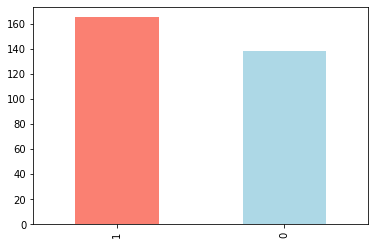

In [5]:
df['target'].value_counts().plot(kind='bar', color=['salmon', 'lightblue']);

In [6]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [7]:
#Are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart disease frequency according to sex


In [9]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [10]:
# Compare target column with sex column

pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


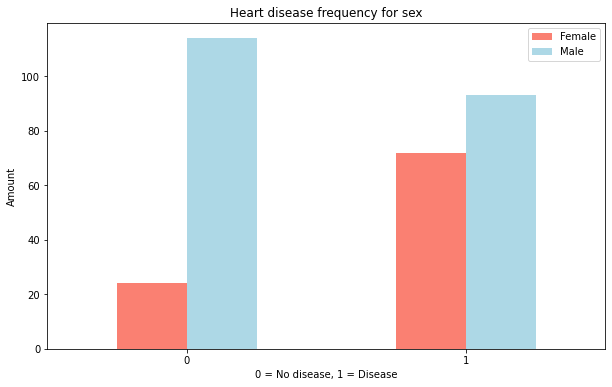

In [11]:
#Create a plot of crosstab

pd.crosstab(df.target,df.sex).plot(kind='bar',figsize=(10,6),color=['salmon','lightblue'])
plt.title('Heart disease frequency for sex')
plt.xlabel('0 = No disease, 1 = Disease')
plt.ylabel('Amount')
plt.legend(['Female','Male'])
plt.xticks(rotation=0);

# Age vs Max heart rate for heart disease

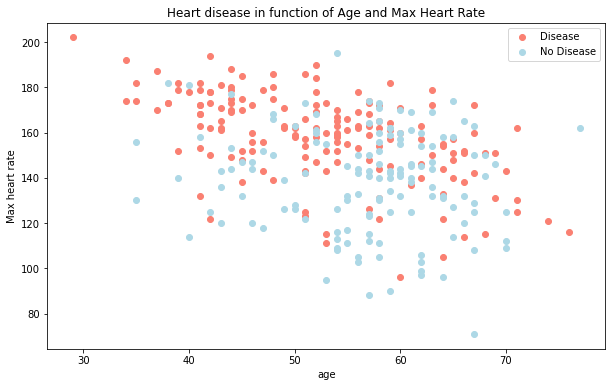

In [12]:
# Create another figure.

plt.figure(figsize=(10,6))

# Scatter with positive examples.
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c='salmon')

# catter with negative examples

plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c='lightblue');

#Add some helpfull info
plt.title('Heart disease in function of Age and Max Heart Rate')
plt.xlabel('age')
plt.ylabel('Max heart rate')
plt.legend(['Disease','No Disease'])

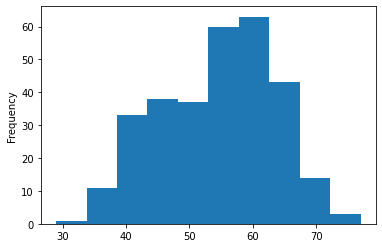

In [13]:
#Check the distribution of the age column with a histograam

df.age.plot.hist();

### Heart disease frequency per chest pain type

cp: chest pain type

 -- Value 1: typical angina

 -- Value 2: atypical angina

 -- Value 3: non-anginal pain

 -- Value 4: asymptomatic

In [14]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


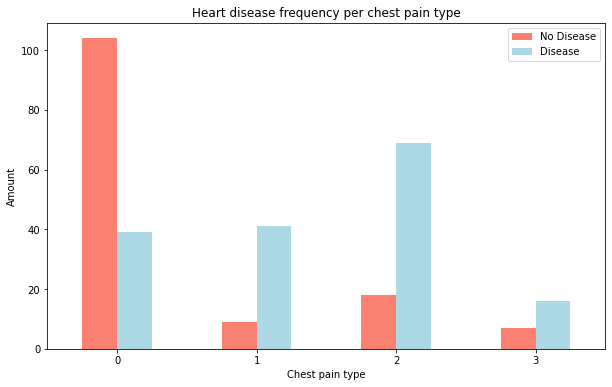

In [15]:
# Make the crosstab more visual

pd.crosstab(df.cp,df.target).plot(kind='bar',figsize=(10,6),color=['salmon','lightblue'])

# Add some communication
plt.title('Heart disease frequency per chest pain type')
plt.xlabel('Chest pain type')
plt.ylabel('Amount')
plt.legend(['No Disease','Disease'])
plt.xticks(rotation=0);


In [16]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
# Make a correlation matrix

df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


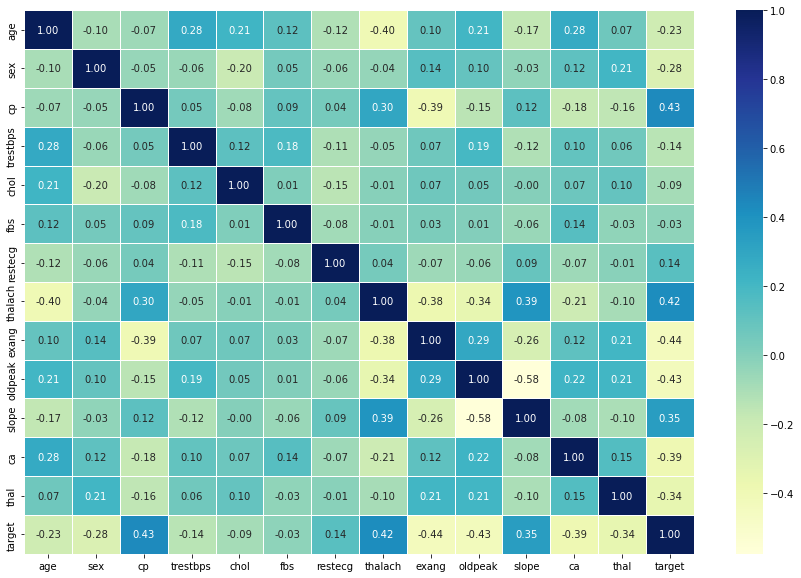

In [18]:
#Let's make our correlation matrix a little prettier

corr_matrix = df.corr()

fig,ax = plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidths=0.5,
              fmt='.2f',
              cmap='YlGnBu');

# 5. Modelling

In [19]:
# Split data into X and y

X = df.drop('target',axis=1)
y = df['target']

In [20]:
# Split data into train and test sets

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2)

In [21]:
y_train,len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

Now we've got our data split into training and test sets, it's time to build a machine learning model.

We'll train it (find the patterns) on the training data set.

And We'll test it (use the patterns) on the test data set.

We're going to try 3 different machine learning models:
1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random forest classifier

In [22]:
# Put models in a dictionary

models = {'Logistic Regression':LogisticRegression(),
         'KNN':KNeighborsClassifier(),
         'Random Forest':RandomForestClassifier()}

# Create a function to fit and score models

def fit_and_score(models,X_train,X_test,y_train,y_test):
    '''
    Fits and evaluates given machine learning models.
    
    models: a dict of different SciKit-Learn machine learning models.
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: test labels
    '''
    
    #Set random seed
    np.random.seed(42)
    #Make aditionary to keep model score
    model_scores = {}
    #Loop through models
    for name,model in models.items():
        #Fit the models to the data
        model.fit(X_train,y_train)
        #Evaluate the model and append it's score to model_scores
        model_scores[name] = model.score(X_test,y_test)
        
    return model_scores

In [23]:
model_scores = fit_and_score(models=models,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

In [24]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model Comparison

In [25]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])

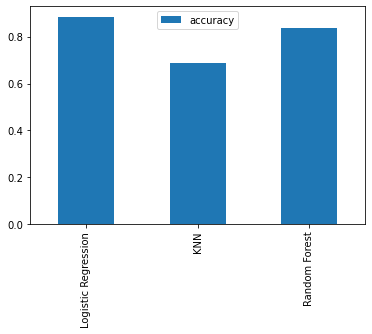

In [26]:
model_compare.T.plot.bar();

Now, We've got a base line model. and we know a model's first predictions aren't always what we should based our next steps off. What should we do?

Let's look at the following: 
* Hyperparameter tuning
* Feature importance
* Confusion Matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC crve
* Area under the curve(AUC)

## Hyperparameter tuning

In [27]:
# Let's tune KNN

train_scores = []
test_scores=[]

# Create a list of different values for n_neighbors

neighbors = range(1,21)
knn = KNeighborsClassifier()

# Loop through different n_neighbors

for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train,y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train,y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test,y_test))



In [28]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [29]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data:75.41%


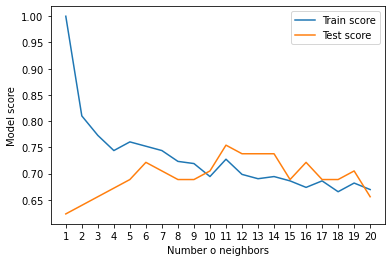

In [30]:
plt.plot(neighbors,train_scores,label='Train score')
plt.plot(neighbors,test_scores,label='Test score')
plt.xticks(np.arange(1,21,1))
plt.xlabel('Number o neighbors')
plt.ylabel('Model score')
plt.legend()

print(f'Maximum KNN score on the test data:{max(test_scores)*100:.2f}%')

### Hyperparameter tuning with RandomizedSearchCV

We're going to tune:
* LogisticRegression()
* RandomForestClassiier()

... using RandomizedSearchCV

In [31]:
# Create a hyperparameter grid for LogisticRegression

log_reg_grid = {'C':np.logspace(-4,4,20),
               'solver':['liblinear']}

# Create hyperparameter grid for RandomForestClassifier

rf_grid  = {'n_estimators':np.arange(10,1000,10),
           'max_depth':[None,3,5,10],
           'min_samples_split':np.arange(2,20,2),
           'min_samples_leaf':np.arange(1,20,2)}

Now we've got hyperparameter grids seup for eacg of our models, let's tune them using RandomizedSearchCV

In [32]:
# Tune Logistic Regression

np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

# Fit random hyperparamter search model for Logistic Regression

rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [33]:
# Find the best params

rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [34]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

Now we've tuned LogisticRegression(), Let's do the same for RandomForestClassifier()

In [35]:
# Tune Random Forest Classifier

np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions=rf_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

# Fit random hyperparamter search model for Random Forest Classifier
 
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


KeyboardInterrupt: 

In [ ]:
# Find the best params
rs_rf.best_params_

# Hyperparameter tuning with GridSearchCV

Since our LogisticRegression model provides the best scores so far, we'll try and improve them again using GridSearchCV

In [36]:
# Different parameters for our LogisticRegression model

# Create a hyperparameter grid for LogisticRegression

log_reg_grid = {'C':np.logspace(-4,4,30),
               'solver':['liblinear']}

# Tune Logistic Regression

np.random.seed(42)

gs_log_reg = GridSearchCV(LogisticRegression(),
                                param_grid=log_reg_grid,
                               cv=5,
                               verbose=True)

# Fit grid hyperparamter search model for Logistic Regression

gs_log_reg.fit(X_train,y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [37]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [38]:
# Evaluate the gridsearch LogisticRegression model

gs_log_reg.score(X_test,y_test)

0.8852459016393442

In [ ]:
model_scores

## Evaluating our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision recall 
* F1-Score

... and it would be great if cross-validation was used where possible.

To make comparisons and evaluate our trained model, first we need to make predictions.

In [39]:
# Make predictions with tuned model. 

y_preds = gs_log_reg.predict(X_test)

In [40]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [41]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

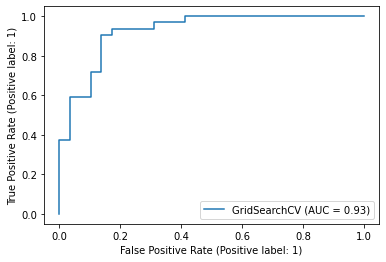

In [42]:
# Plot ROC curve ad calculate AUC metric

plot_roc_curve(gs_log_reg,X_test,y_test)

In [43]:
# Confusion matrix
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


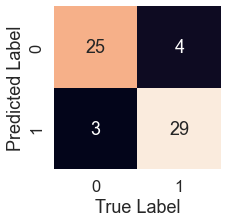

In [44]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    '''
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    
    '''
    
    fig, ax = plt.subplots(figsize=(3,3))
    
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                    annot = True,
                    cbar=False)
    
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')
    
plot_conf_mat(y_test,y_preds)

Now we've got a ROC curve, an AUC metric and a confusion matrix, Let's get a classification report aswell as cross-validated precision, recall and f1-score

In [45]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metrics using cross-validation

We're going to calculate pecision,recall and f1-score of our model using cross-validation and to do so, we'll be using cross_val_score()

In [46]:
# Check best hyper parameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [48]:
# Create anew classifier with best parameters

clf = LogisticRegression(C=0.20433597178569418,
                        solver='liblinear')

In [52]:
# Cross-validated accuracy
cv_ac = cross_val_score(clf,
                      X,y,cv=5,scoring='accuracy')
cv_acc = np.mean(cv_ac)
cv_acc

0.8446994535519124

In [55]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                      X,y,cv=5,scoring='precision')
cv_precision = np.mean(cv_precision)
cv_precision

0.8215873015873015

In [56]:
# Cross-validated recall

cv_recall = cross_val_score(clf,
                      X,y,cv=5,scoring='recall')
cv_recall = np.mean(cv_recall)
cv_recall

0.9272727272727274

In [57]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                      X,y,cv=5,scoring='f1')
cv_f1 = np.mean(cv_f1)
cv_f1

0.8705403543192143

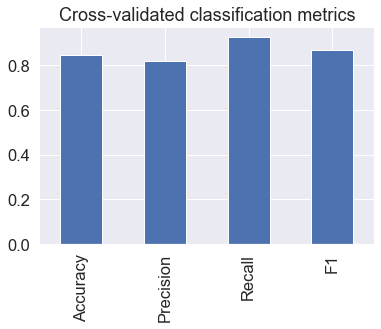

In [59]:
# Visualize cross-validated metrics

cv_metrics = pd.DataFrame({'Accuracy':cv_acc,
                          'Precision': cv_precision,
                          'Recall':cv_recall,
                          'F1':cv_f1},
                         index=[0])

cv_metrics.T.plot.bar(title='Cross-validated classification metrics',
                     legend=False);

### Feature Importance

Feature impotance is another way of asking, "Which features contributed most to the outcoms of the model and how did they contribute?"

Finding feature importance is different for each machine learning model. One way to find feature importance i to search for "(Model name) feature importance". 

Let's find the feature importance for our logistic regression model...

In [61]:
# Fit an instance of Logistic Regression

gs_log_reg.best_params_

clf = LogisticRegression(C=0.20433597178569418,
                        solver='liblinear')

clf.fit(X_train,y_train);

In [62]:
# Check coef_

clf.coef_

array([[ 0.00316728, -0.86044649,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275846,  0.02459361, -0.60413079, -0.56862804,
         0.45051628, -0.63609896, -0.67663371]])

In [64]:
# Match coef's of features to columns

feature_dict = dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.003167279945083769,
 'sex': -0.8604464867754459,
 'cp': 0.660670413299181,
 'trestbps': -0.011569931329394382,
 'chol': -0.0016637448851907206,
 'fbs': 0.043861073084505,
 'restecg': 0.31275845540947567,
 'thalach': 0.02459361391618924,
 'exang': -0.6041307886198257,
 'oldpeak': -0.5686280447236366,
 'slope': 0.4505162763068827,
 'ca': -0.6360989588325804,
 'thal': -0.67663371300804}

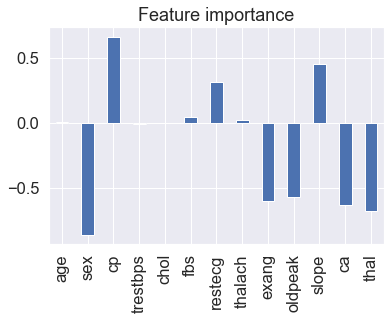

In [66]:
# Visualize feature importance

feature_df = pd.DataFrame(feature_dict,index=[0])

feature_df.T.plot.bar(title='Feature importance',legend = False);

In [68]:
pd.crosstab(df['sex'],df['target'])

target,0,1
sex,,
0,24,72
1,114,93


In [69]:
pd.crosstab(df['slope'],df['target'])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


# 6. Experimentation

If you haven't hit your evaluation metric yet... ask yourself:

* Could you collect more data?
* Could you try better model? Like CatBoost or XGBoost?
* Could you improve the current models? (beyond what we've done so far)
* If your model is good enough(you have hit your evaluation metrics, how would you export it and share it with others?)


In [76]:
# Export models

from joblib import dump, load

In [74]:
dump(gs_log_reg,'hd_lg.joblib')

['hd_lg.joblib']